In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                 parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values=['nan','?'],
                 index_col='Datetime')

<ipython-input-4-65c48a71621d>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-4-65c48a71621d>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=';',


In [19]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month
Datetime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,12
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,12
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,12
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,12
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,12


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: H
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
 7   hour                   34589 non-null  int32  
 8   day_of_week            34589 non-null  int32  
 9   month                  34589 non-null  int32  
dtypes: float64(7), int32(3)
memory usage: 2.5 MB


In [21]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month
count,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000,34589.000000
mean,1.091647,0.123712,240.839755,4.627892,1.121880,1.298475,6.458390,11.501084,2.998959,6.450548
std,0.891965,0.066402,2.981708,3.734136,3.515967,4.166688,7.304059,6.922394,2.000072,3.415879
min,0.124000,0.000000,225.834500,0.503333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.343667,0.078333,239.212333,1.520000,0.000000,0.000000,0.650000,6.000000,1.000000,3.000000
50%,0.821767,0.107800,240.935333,3.500000,0.000000,0.333333,1.666667,12.000000,3.000000,6.000000
75%,1.570200,0.148700,242.673667,6.563333,0.000000,0.666667,13.950000,18.000000,5.000000,9.000000
max,6.560533,0.774333,251.902000,28.383333,48.366667,46.433333,21.550000,23.000000,6.000000,12.000000


In [22]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day_of_week              0
month                    0
dtype: int64

In [23]:
df.shape

(34589, 10)

In [24]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day_of_week', 'month'],
      dtype='object')

In [25]:
df.index

DatetimeIndex(['2006-12-16 17:00:00', '2006-12-16 18:00:00',
               '2006-12-16 19:00:00', '2006-12-16 20:00:00',
               '2006-12-16 21:00:00', '2006-12-16 22:00:00',
               '2006-12-16 23:00:00', '2006-12-17 00:00:00',
               '2006-12-17 01:00:00', '2006-12-17 02:00:00',
               ...
               '2010-11-26 12:00:00', '2010-11-26 13:00:00',
               '2010-11-26 14:00:00', '2010-11-26 15:00:00',
               '2010-11-26 16:00:00', '2010-11-26 17:00:00',
               '2010-11-26 18:00:00', '2010-11-26 19:00:00',
               '2010-11-26 20:00:00', '2010-11-26 21:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=34589, freq='H')

In [26]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
hour                       int32
day_of_week                int32
month                      int32
dtype: object

In [27]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,month
Global_active_power,1.000000,0.312364,-0.379519,0.999423,0.496377,0.440207,0.695509,0.329774,0.076978,-0.038245
Global_reactive_power,0.312364,1.000000,-0.147577,0.328489,0.328638,0.256834,0.103563,0.214416,0.116406,0.045673
Voltage,-0.379519,-0.147577,1.000000,-0.392843,-0.207764,-0.162987,-0.277351,-0.189012,-0.022977,-0.016389
Global_intensity,0.999423,0.328489,-0.392843,1.000000,0.504783,0.447492,0.685718,0.331559,0.078934,-0.036944
Sub_metering_1,0.496377,0.328638,-0.207764,0.504783,1.000000,0.115564,0.195251,0.187543,0.091402,-0.013029
Sub_metering_2,0.440207,0.256834,-0.162987,0.447492,0.115564,1.000000,0.124383,0.120364,0.043866,-0.013514
Sub_metering_3,0.695509,0.103563,-0.277351,0.685718,0.195251,0.124383,1.000000,0.129923,0.015425,-0.035203
hour,0.329774,0.214416,-0.189012,0.331559,0.187543,0.120364,0.129923,1.000000,0.000203,0.000281
day_of_week,0.076978,0.116406,-0.022977,0.078934,0.091402,0.043866,0.015425,0.000203,1.000000,-0.000228
month,-0.038245,0.045673,-0.016389,-0.036944,-0.013029,-0.013514,-0.035203,0.000281,-0.000228,1.000000


In [5]:
# Data Preprocessing
df.fillna(df.mean(), inplace=True)  # Handling missing values
df = df.resample('H').mean()  # Resampling to hourly data

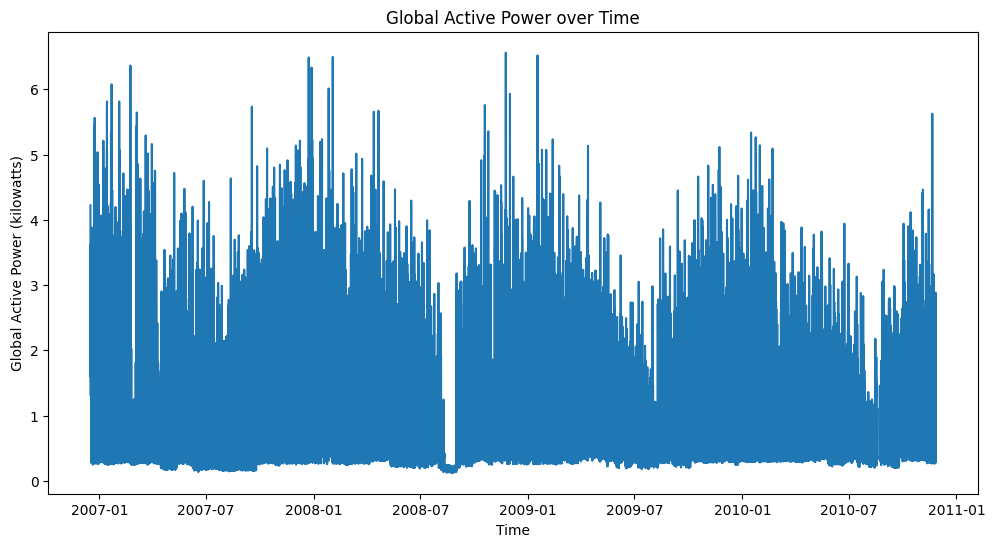

In [6]:
# Exploratory Data Analysis (EDA)
# Plot Global Active Power over time
plt.figure(figsize=(12,6))
plt.plot(df['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

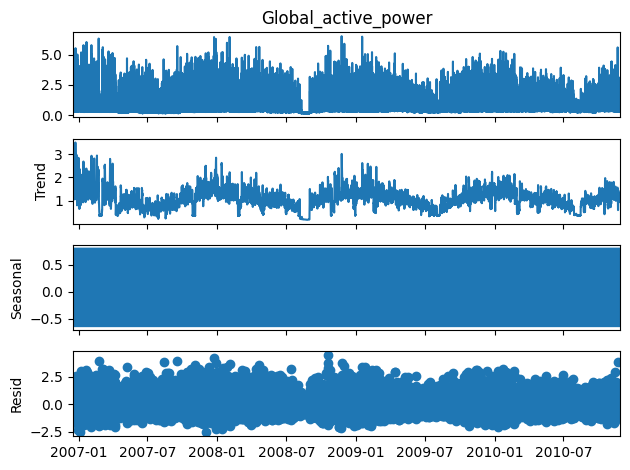

In [7]:
# Decompose the time series
result = seasonal_decompose(df['Global_active_power'].dropna(), model='additive')
result.plot()
plt.show()

In [8]:
# Feature Engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [9]:
# Train-Test Split
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [10]:
# ARIMA Model
model = ARIMA(train['Global_active_power'].dropna(), order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

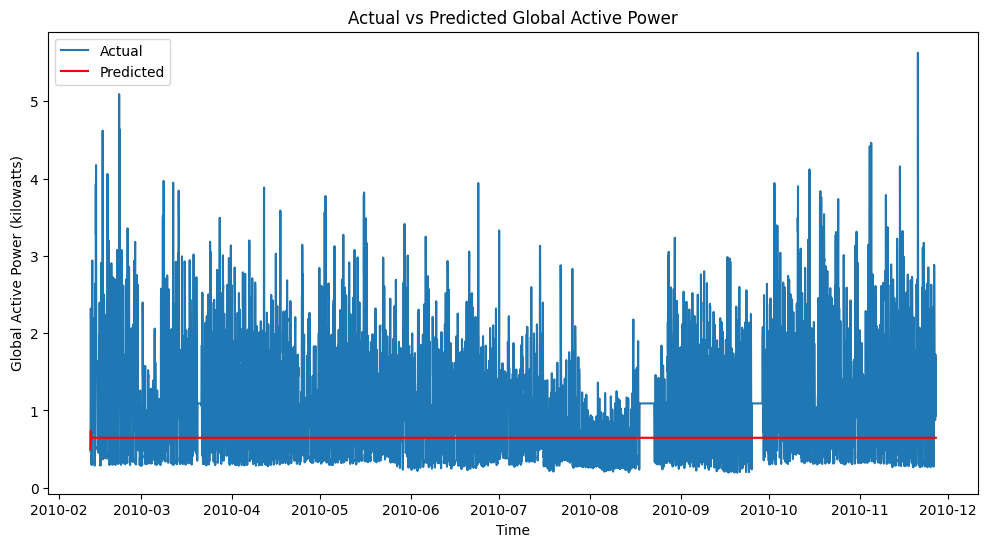

In [11]:
# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Global_active_power'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

In [12]:
# Evaluate Model
mse = mean_squared_error(test['Global_active_power'].dropna(), predictions)
mae = mean_absolute_error(test['Global_active_power'].dropna(), predictions)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 0.6539043078304486, MAE: 0.5882650051846179


MSE: 0.6539043078304486, MAE: 0.5882650051846179

In [13]:
# Future Prediction
future_steps = 24  # Forecast for next 24 hours
future_predictions = model_fit.forecast(steps=future_steps)

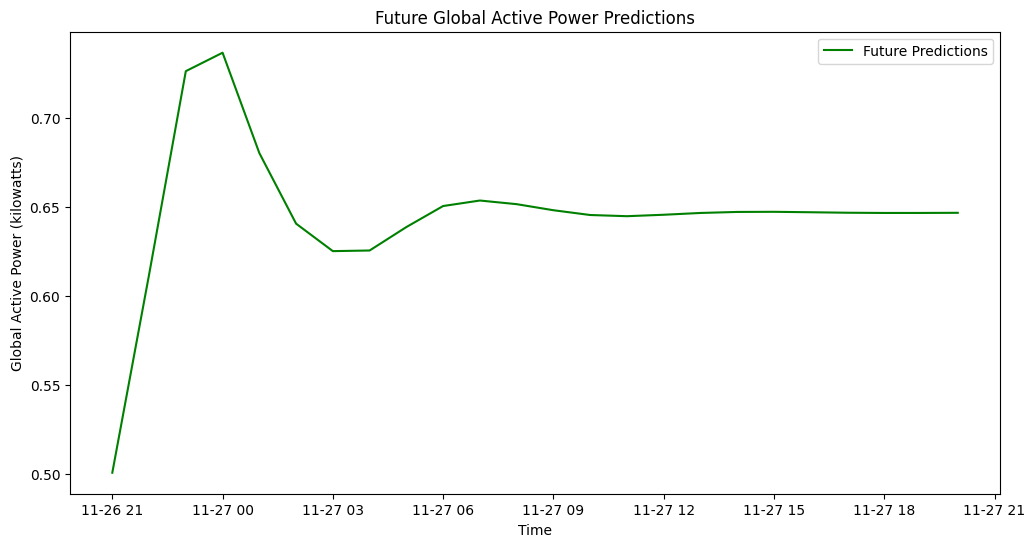

In [14]:
# Plot Future Predictions
plt.figure(figsize=(12,6))
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps, freq='H'), future_predictions, label='Future Predictions', color='green')
plt.title('Future Global Active Power Predictions')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

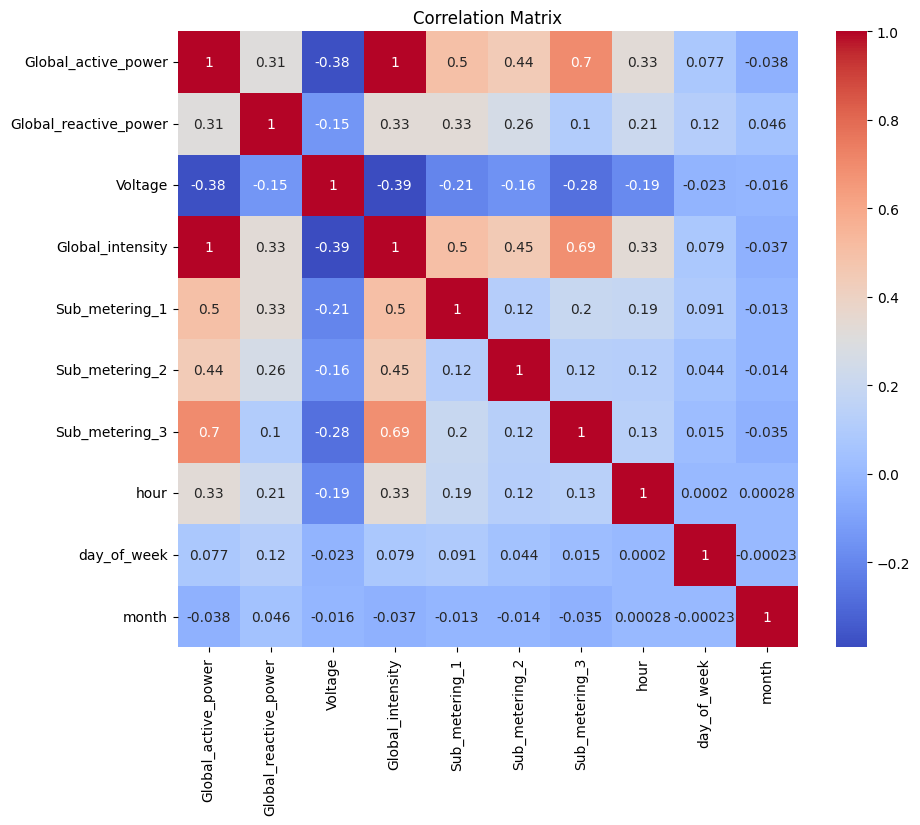

In [15]:
# Additional Visualizations and Analysis
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

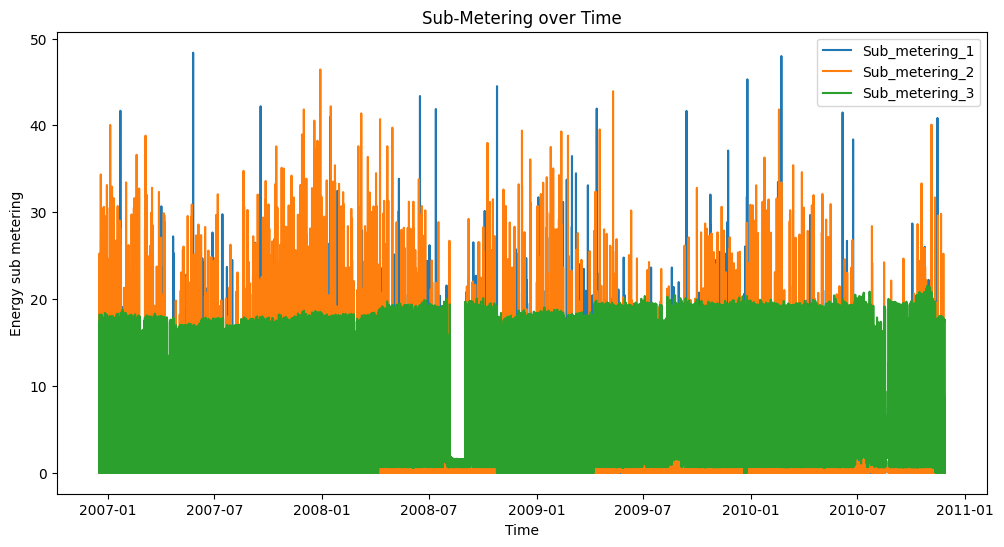

In [16]:
# Sub-Metering over time
plt.figure(figsize=(12,6))
plt.plot(df['Sub_metering_1'], label='Sub_metering_1')
plt.plot(df['Sub_metering_2'], label='Sub_metering_2')
plt.plot(df['Sub_metering_3'], label='Sub_metering_3')
plt.title('Sub-Metering over Time')
plt.xlabel('Time')
plt.ylabel('Energy sub metering')
plt.legend()
plt.show()

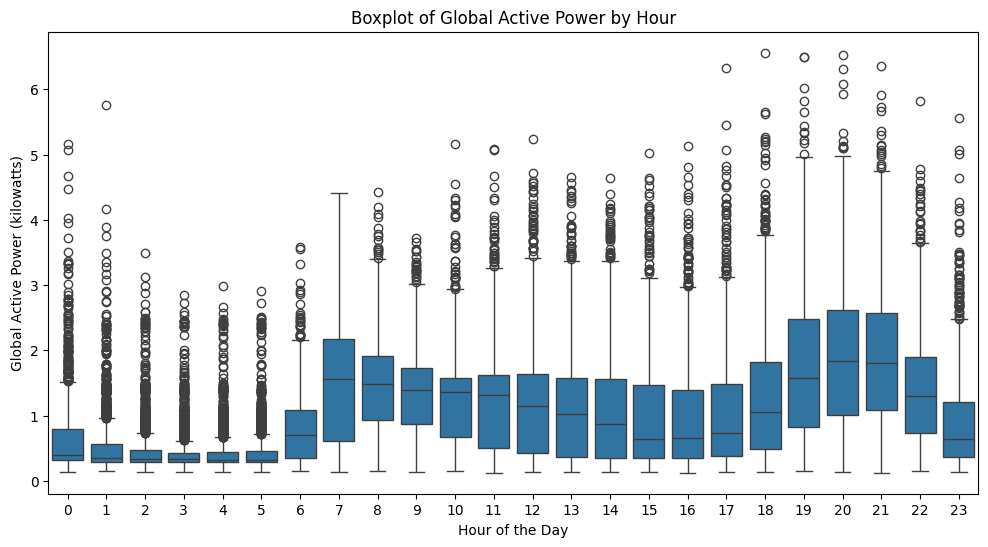

In [17]:
# Boxplot of Global Active Power by Hour
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='Global_active_power', data=df)
plt.title('Boxplot of Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

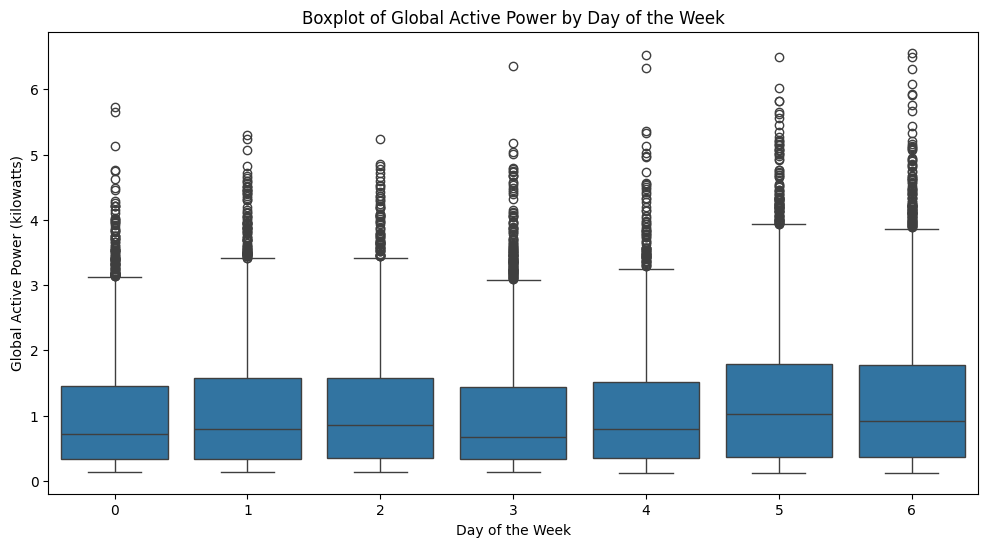

In [18]:
# Boxplot of Global Active Power by Day of the Week
plt.figure(figsize=(12,6))
sns.boxplot(x='day_of_week', y='Global_active_power', data=df)
plt.title('Boxplot of Global Active Power by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

This code provides a comprehensive approach to time series forecasting of household electricity consumption, covering data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and future prediction. The visualizations help in understanding patterns and trends in the data, and the ARIMA model provides a baseline for forecasting future consumption. Further improvements can be made by experimenting with more advanced models like SARIMA, LSTM, or other machine learning techniques.





